In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [2]:
wine_df=pd.read_excel("C:\Kat\Tuyen\Project\wine.xls")

In [3]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.435294,0.260870,-0.358974,-0.745455,-0.595745,-0.565217,-0.597122,0.177570,0.448276,-0.445783,-0.647059,5
1,-0.341176,0.652174,-0.358974,-0.490909,-0.361702,0.043478,-0.122302,-0.009346,-0.264368,-0.156627,-0.490196,5
2,-0.341176,0.391304,-0.923077,-0.600000,-0.425532,-0.391304,-0.309353,0.028037,-0.126437,-0.228916,-0.490196,5
3,0.458824,-0.652174,0.410256,-0.745455,-0.606383,-0.304348,-0.223022,0.214953,-0.356322,-0.397590,-0.490196,6
4,-0.435294,0.260870,-0.358974,-0.745455,-0.595745,-0.565217,-0.597122,0.177570,0.448276,-0.445783,-0.647059,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1446,-0.717647,0.043478,-0.820513,-0.709091,-0.446809,0.347826,-0.453237,-0.364486,0.310345,-0.397590,-0.215686,5
1447,-0.788235,-0.065217,-0.769231,-0.636364,-0.744681,0.652174,-0.352518,-0.323364,0.471264,0.036145,0.058824,6
1448,-0.694118,-0.152174,-0.692308,-0.600000,-0.595745,0.217391,-0.510791,-0.207477,0.241379,0.012048,-0.019608,6
1449,-0.788235,0.141304,-0.717949,-0.709091,-0.606383,0.347826,-0.453237,-0.257944,0.586207,-0.084337,-0.333333,5


In [5]:
#Turn dataframe into values
wine_array=wine_df.drop(columns='quality').values

In [6]:
wine_array

array([[-0.43529412,  0.26086957, -0.35897436, ...,  0.44827586,
        -0.44578313, -0.64705882],
       [-0.34117647,  0.65217391, -0.35897436, ..., -0.26436782,
        -0.15662651, -0.49019608],
       [-0.34117647,  0.39130435, -0.92307692, ..., -0.12643678,
        -0.22891566, -0.49019608],
       ...,
       [-0.69411765, -0.15217391, -0.69230769, ...,  0.24137931,
         0.01204819, -0.01960784],
       [-0.78823529,  0.14130435, -0.71794872, ...,  0.5862069 ,
        -0.08433735, -0.33333333],
       [-0.76470588, -0.58695652,  0.17948718, ...,  0.17241379,
        -0.20481928, -0.01960784]])

## Splitting the dataset

Ratio 0.75:0.25, train: test

In [7]:
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(wine_array,wine_df.quality,test_size=0.25,random_state=5)

## Import all the learning algorithms we want to test

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

## Prepare an array with all the algorithms

In [24]:
models = []
models.append(('LR',LogisticRegression(solver='saga',multi_class='multinomial')))
models.append(('CARD',DecisionTreeClassifier()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
models.append(('LSVC',LinearSVC()))
models.append(('RFC',RandomForestClassifier()))

## Import some utilities of sklearn to compare algorithms

In [25]:
from sklearn import  model_selection
from sklearn.metrics import classification_report #Reporting metric
from sklearn.metrics import confusion_matrix #Confusion_matrix Reporting
from sklearn.metrics import accuracy_score #Accuracy calculating

In [26]:
# Prepare the configuration to run the test
results=[]
names=[]
seed=7

## Evaluate each model in turn and save the performance result

In [27]:
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

LR:0.592839(0.051859)
CARD:0.589067(0.053278)
DTR:0.584514(0.060766)
KNN:0.559735(0.046448)
LDA:0.590078(0.041825)
NB:0.570821(0.038232)


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

SVM:0.572630(0.048409)
LSVC:0.591004(0.044699)


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

RFC:0.665392(0.047560)


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


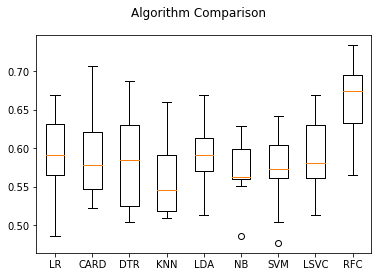

In [28]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## ROC CURVE FOR COMPARISON

In [29]:
#Define x and y axis
x = wine_df.drop(axis = 'columns', columns = 'quality')
y_true = np.array(wine_df['quality'])

In [35]:
#ROC CURVE IS FOR BINARY CLASSIFICATION

## Building best model

RFC is the best model according to accuracy scoring

In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion':['gini', 'entropy'],
    'max_features':['auto', 'sqrt', 'log2'],
    'class_weight':['balanced', 'balanced_subsample'],
}

model_rfc= RandomForestClassifier()

grid_search = GridSearchCV(
    model_rfc, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, Y_train)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [40]:
print("The best score for this model is",grid_search.best_score_)

The best score for this model is 0.6599264705882353


In [41]:
rfc = grid_search.best_estimator_

In [42]:
# Use the whole dataset to train the model
X = np.append(X_train, X_test, axis=0)
Y = np.append(Y_train, Y_test, axis=0)

In [43]:
# Train the model
rfc.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

## Modify threshold:

In [44]:
#Define a function to optimize the threshold
def optimize_threshold(model):
    bestthresh = []
    for i in range(1,101):
        threshold = i/100
        pred = np.where(model.predict_proba(X_test)[:,1] > threshold, 1, 0)
        tn, fp, fn, tp = confusion_matrix(Y_test, pred).ravel()
        recall = tp / (tp + fn)
        precision = tp / (tp + fp)
        f1 = (2*recall*precision)/(recall+precision)
        if recall>=0.9 and f1>=0.7:
            bestthresh.append(threshold)
    return bestthresh

## Normalize data using sklearn StandardScaler

In [68]:
from sklearn.preprocessing import StandardScaler as Scaler
scaler = Scaler()

In [ ]:
def prediction(data):
    data_scaled=scaler.transform(data)
    predict=lr.predict_proba(data_scaled)[:,1]
    if predict > "bestthresh":
        print("The person is positive ...")
    else:
        print("The person is negative ...")

## Save the model

In [69]:
import joblib

In [71]:
joblib.dump(rfc, "C:/Kat/Tuyen/Project/model_deployment")

['C:/Kat/Tuyen/Project/model_deployment']

### Saving model to disk

In [74]:
import pickle

In [75]:
pickle.dump(rfc, open("C:/Kat/Tuyen/Project/model.pkl","wb"))

### Loading model to check

In [76]:
model = pickle.load(open("C:/Kat/Tuyen/Project/model.pkl","rb"))

In [77]:
print(model.predict([[8.0, 0.6, 0.3, 5, 18, 30, 65,1,3,0.8,12]]))

[5]
